In [38]:
try:
    import os
    import glob
    import numpy as np
    import pandas as pd

    # Importing libraries for data visualization
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Creating a model
    import tensorflow as tf
    from tensorflow.keras.models import Sequential, Model
    from tensorflow.keras.layers import Dense, Activation, Input

    # Importing libraries for evaluation
    from itertools import product
    from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
    from sklearn.model_selection import train_test_split, KFold
    from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
    from sklearn.metrics import classification_report,confusion_matrix

except Exception as e:
    print(f"Error : {e}")

In [27]:
# Find the CSV file in the Datasets directory
data_path = '../Datasets/*.csv'
file_list = glob.glob(data_path)

for file in file_list:
    print(f"Found file: {file}")

# Ensure there is exactly one file
if len(file_list) == 1:
    # Load the dataset
    df = pd.read_csv(file_list[0])
    print(f"Loaded dataset: {file_list[0]}")
else:
    raise FileNotFoundError("No CSV file found or multiple CSV files found in the Datasets directory.")

Found file: ../Datasets/Dataset.csv
Loaded dataset: ../Datasets/Dataset.csv


In [28]:
# File path to save the trained model
destination = '../Models/'
os.makedirs(destination, exist_ok=True)
print(f"Model will be saved to: {destination}")

Model will be saved to: ../Models/


In [29]:
categorical_cols_unified = ['partType', 'microstructure', 'seedLocation', 'castType']

# Initialize and fit the encoder
ohe = OneHotEncoder(sparse_output=False, drop=None)
# Reshape the data to handle multiple categorical columns
encoded_data = ohe.fit_transform(df[categorical_cols_unified].values)

# Convert to DataFrame with feature names
encoded_df = pd.DataFrame(
    encoded_data,
    columns=ohe.get_feature_names_out(categorical_cols_unified)
)

# Combine with non-categorical columns if needed
df = pd.concat([df.drop(columns=categorical_cols_unified), encoded_df], axis=1)

In [30]:
# Features
X = df.drop('Lifespan',axis=1)

# Target
y = df['Lifespan']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 23)
(300, 23)
(700,)
(300,)


In [32]:
# Create the scaler
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0
Min:  0.0


In [33]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [34]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1851126.0000 - val_loss: 1776179.3750
Epoch 2/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1834680.2500 - val_loss: 1775597.6250
Epoch 3/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1792345.5000 - val_loss: 1774950.0000
Epoch 4/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1805207.5000 - val_loss: 1774159.3750
Epoch 5/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1818765.1250 - val_loss: 1773137.2500
Epoch 6/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1801332.1250 - val_loss: 1771792.2500
Epoch 7/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1822369.8750 - val_loss: 1770016.2500
Epoch 8/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1792462.3750 - val_loss: 1767652.5000
Epoch 9/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1817713.0000 - val_loss: 1764479.1250
Epoch 10/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1769191.5000 - val_loss: 1760193.5000
Epoch 11/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [35]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['Lifespan'].describe())

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAE:  152.39851504720048
MSE:  37269.88456688071
RMSE:  193.05409751383345
Variance Regression Score:  0.6907014363383501


Descriptive Statistics:
 count    1000.000000
mean     1298.556320
std       340.071434
min       417.990000
25%      1047.257500
50%      1266.040000
75%      1563.050000
max      2134.530000
Name: Lifespan, dtype: float64


In [36]:
# Get features of new part type
single_partType = df.drop('Lifespan', axis=1).iloc[0]
print(f'Features of new part type:\n{single_partType}')

# Convert to DataFrame with feature names
single_partType_df = pd.DataFrame([single_partType.values], columns=single_partType.index)

# Scale the features while preserving feature names
single_partType_scaled = scaler.transform(single_partType_df)

# Run the model and get the lifespan prediction
print('\nPrediction Lifespan:', model.predict(single_partType_scaled)[0,0])

# Print original lifespan
print('\nOriginal Lifespan:', df.iloc[0]['Lifespan'])

Features of new part type:
coolingRate                   13.00
quenchTime                     3.84
forgeTime                      6.47
HeatTreatTime                 46.87
Nickel%                       65.73
Iron%                         16.52
Cobalt%                       16.82
Chromium%                      0.93
smallDefects                  10.00
largeDefects                   0.00
sliverDefects                  0.00
partType_Blade                 0.00
partType_Block                 0.00
partType_Nozzle                1.00
partType_Valve                 0.00
microstructure_colGrain        0.00
microstructure_equiGrain       1.00
microstructure_singleGrain     0.00
seedLocation_Bottom            1.00
seedLocation_Top               0.00
castType_Continuous            0.00
castType_Die                   1.00
castType_Investment            0.00
Name: 0, dtype: float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Prediction Lifespan: 1493.33

Original Lifespan: 1469.17


Total combinations to test: 144
Starting grid search with cross-validation...

Combination 1/144:
Mean Validation Loss: 107815.3125 (±6571.0783)
Time taken: 20.67 seconds
----------------------------------------------------------------
    n_layers=2,
    n_neurons=16,
    activation=relu,
    learning_rate=0.001,
    batch_size=64,
    epochs=200,

Combination 2/144:
Mean Validation Loss: 97337.1453 (±7415.7840)
Time taken: 34.69 seconds
----------------------------------------------------------------
    n_layers=2,
    n_neurons=16,
    activation=relu,
    learning_rate=0.001,
    batch_size=64,
    epochs=400,

Combination 3/144:
Mean Validation Loss: 114695.5859 (±8366.2648)
Time taken: 17.22 seconds
----------------------------------------------------------------
    n_layers=2,
    n_neurons=16,
    activation=relu,
    learning_rate=0.001,
    batch_size=128,
    epochs=200,

Combination 4/144:
Mean Validation Loss: 104705.5703 (±8082.9146)
Time taken: 32.25 seconds
----------

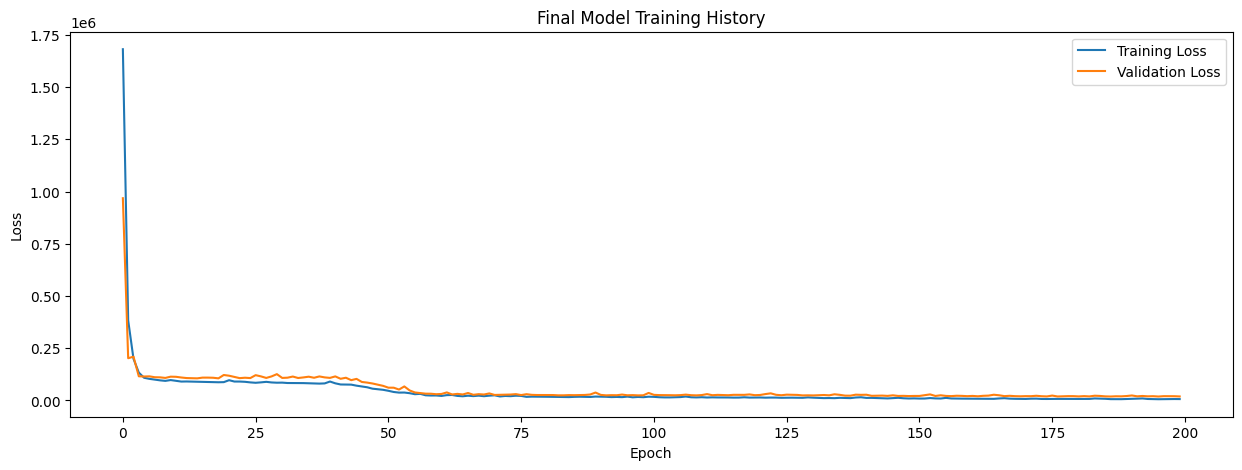

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Final Model Performance on Test Set:
MSE: 19339.7881
RMSE: 139.0676
MAE: 111.7367
Explained Variance Score: 0.8387


In [ ]:
def create_model(n_layers, n_neurons, activation, learning_rate):
    """
    Creates a neural network model with specified hyperparameters
    
    Parameters:
    n_layers (int): Number of hidden layers
    n_neurons (int): Number of neurons per layer
    activation (str): Activation function to use
    learning_rate (float): Learning rate for Adam optimizer
    
    Returns:
    model: Compiled Keras model
    """
    # Define the input layer explicitly
    inputs = Input(shape=(X_train.shape[1],))
    
    # First hidden layer
    x = Dense(n_neurons, activation=activation)(inputs)
    
    # Additional hidden layers
    for _ in range(n_layers - 1):
        x = Dense(n_neurons, activation=activation)(x)
    
    # Output layer
    outputs = Dense(1)(x)
    
    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    
    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 loss='mse')
    
    return model

# Define hyperparameter grid
param_grid = {
    'n_layers': [2, 3, 4],
    'n_neurons': [16, 32, 64],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01],
    'batch_size': [64, 128],
    'epochs': [200, 400]
}

# Create all combinations of hyperparameters
param_combinations = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

# Initialize results storage
results = []

# Perform k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=101)

print(f"Total combinations to test: {len(param_combinations)}")
print("Starting grid search with cross-validation...")

for i, params in enumerate(param_combinations, 1):
    start_time = time.time()
    
    # Store validation scores for each fold
    fold_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(k_fold.split(X_train), 1):
        # Split data for this fold
        X_train_fold = X_train[train_idx]
        y_train_fold = y_train.iloc[train_idx]
        X_val_fold = X_train[val_idx]
        y_val_fold = y_train.iloc[val_idx]
        
        # Create and train model
        model = create_model(
            n_layers=params['n_layers'],
            n_neurons=params['n_neurons'],
            activation=params['activation'],
            learning_rate=params['learning_rate']
        )
        
        # Train model
        history = model.fit(
            X_train_fold, y_train_fold,
            validation_data=(X_val_fold, y_val_fold),
            batch_size=params['batch_size'],
            epochs=params['epochs'],
            verbose=0
        )
        
        # Get the best validation score for this fold
        best_val_loss = min(history.history['val_loss'])
        fold_scores.append(best_val_loss)
    
    # Calculate mean validation score across folds
    mean_val_loss = np.mean(fold_scores)
    std_val_loss = np.std(fold_scores)
    
    # Store results
    results.append({
        **params,
        'mean_val_loss': mean_val_loss,
        'std_val_loss': std_val_loss,
        'time': time.time() - start_time
    })
    
    print(f"\nCombination {i}/{len(param_combinations)}:")
    print(f"Mean Validation Loss: {mean_val_loss:.4f} (±{std_val_loss:.4f})")
    print(f"Time taken: {results[-1]['time']:.2f} seconds")
    print(f"-" * 64)
    for param, value in params.items():
        print(f"    {param}={value},")

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Sort by mean validation loss
best_params = results_df.loc[results_df['mean_val_loss'].idxmin()]

print(f"Mean Validation Loss: {best_params['mean_val_loss']:.4f}")
print(f"-" * 64)
print("Best hyperparameters found:")
print(f"-" * 64)
for param, value in best_params.items():
    if param not in ['mean_val_loss', 'std_val_loss', 'time']:
        print(f"    {param}={value},\n")
print(f"-" * 64)

# Create and train final model with best parameters
final_model = create_model(
    n_layers=int(best_params['n_layers']),
    n_neurons=int(best_params['n_neurons']),
    activation=best_params['activation'],
    learning_rate=best_params['learning_rate']
)

# Train the final model
final_history = final_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=int(best_params['batch_size']),
    epochs=int(best_params['epochs']),
    verbose=1
)

# Plot training history for final model
plt.figure(figsize=(15, 5))
plt.plot(final_history.history['loss'], label='Training Loss')
plt.plot(final_history.history['val_loss'], label='Validation Loss')
plt.title('Final Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate final model on test set
test_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, test_predictions)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, test_predictions)
final_ev_score = explained_variance_score(y_test, test_predictions)

print("\nFinal Model Performance on Test Set:")
print(f"MSE: {final_mse:.4f}")
print(f"RMSE: {final_rmse:.4f}")
print(f"MAE: {final_mae:.4f}")
print(f"Explained Variance Score: {final_ev_score:.4f}")

In [39]:
# Get features of new part type
single_partType = df.drop('Lifespan', axis=1).iloc[0]
print(f'Features of new part type:\n{single_partType}')

# Convert to DataFrame with feature names
single_partType_df = pd.DataFrame([single_partType.values], columns=single_partType.index)

# Scale the features while preserving feature names
single_partType_scaled = scaler.transform(single_partType_df)

# Run the model and get the lifespan prediction
print('\nPrediction Lifespan:', final_model.predict(single_partType_scaled)[0,0])

# Print original lifespan
print('\nOriginal Lifespan:', df.iloc[0]['Lifespan'])

Features of new part type:
coolingRate                   13.00
quenchTime                     3.84
forgeTime                      6.47
HeatTreatTime                 46.87
Nickel%                       65.73
Iron%                         16.52
Cobalt%                       16.82
Chromium%                      0.93
smallDefects                  10.00
largeDefects                   0.00
sliverDefects                  0.00
partType_Blade                 0.00
partType_Block                 0.00
partType_Nozzle                1.00
partType_Valve                 0.00
microstructure_colGrain        0.00
microstructure_equiGrain       1.00
microstructure_singleGrain     0.00
seedLocation_Bottom            1.00
seedLocation_Top               0.00
castType_Continuous            0.00
castType_Die                   1.00
castType_Investment            0.00
Name: 0, dtype: float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Prediction Lifespan: 1413.9783

Original Lifespan: 1469.17
